# Complex Model

#### Import the pre-made model:

In [6]:
from pgmpy.utils import get_example_model

# https://www.bnlearn.com/bnrepository/discrete-medium.html#child
model=get_example_model('child')

##### This model has the following structure and CPDs:
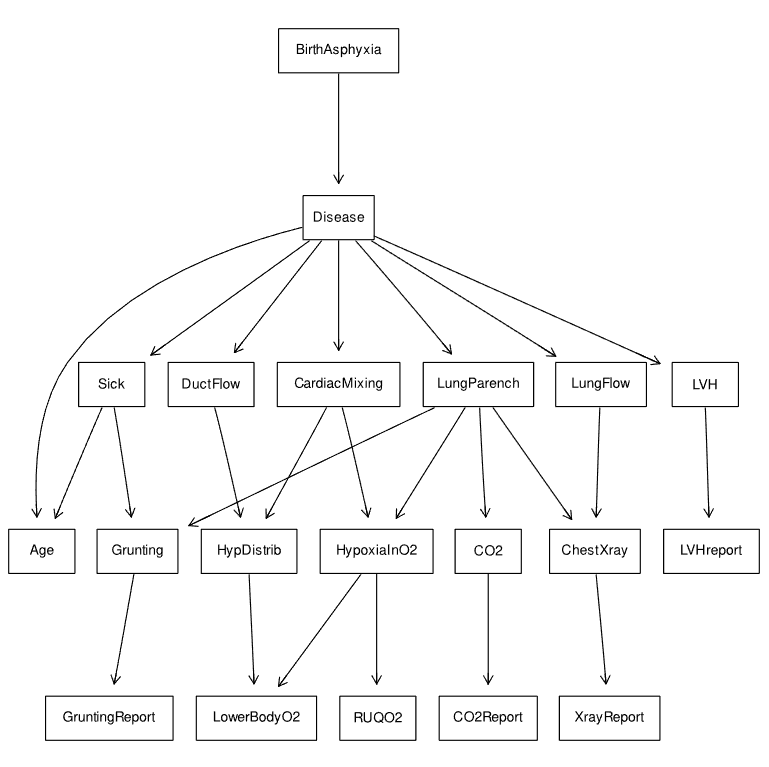

#### Let's check the model structure:

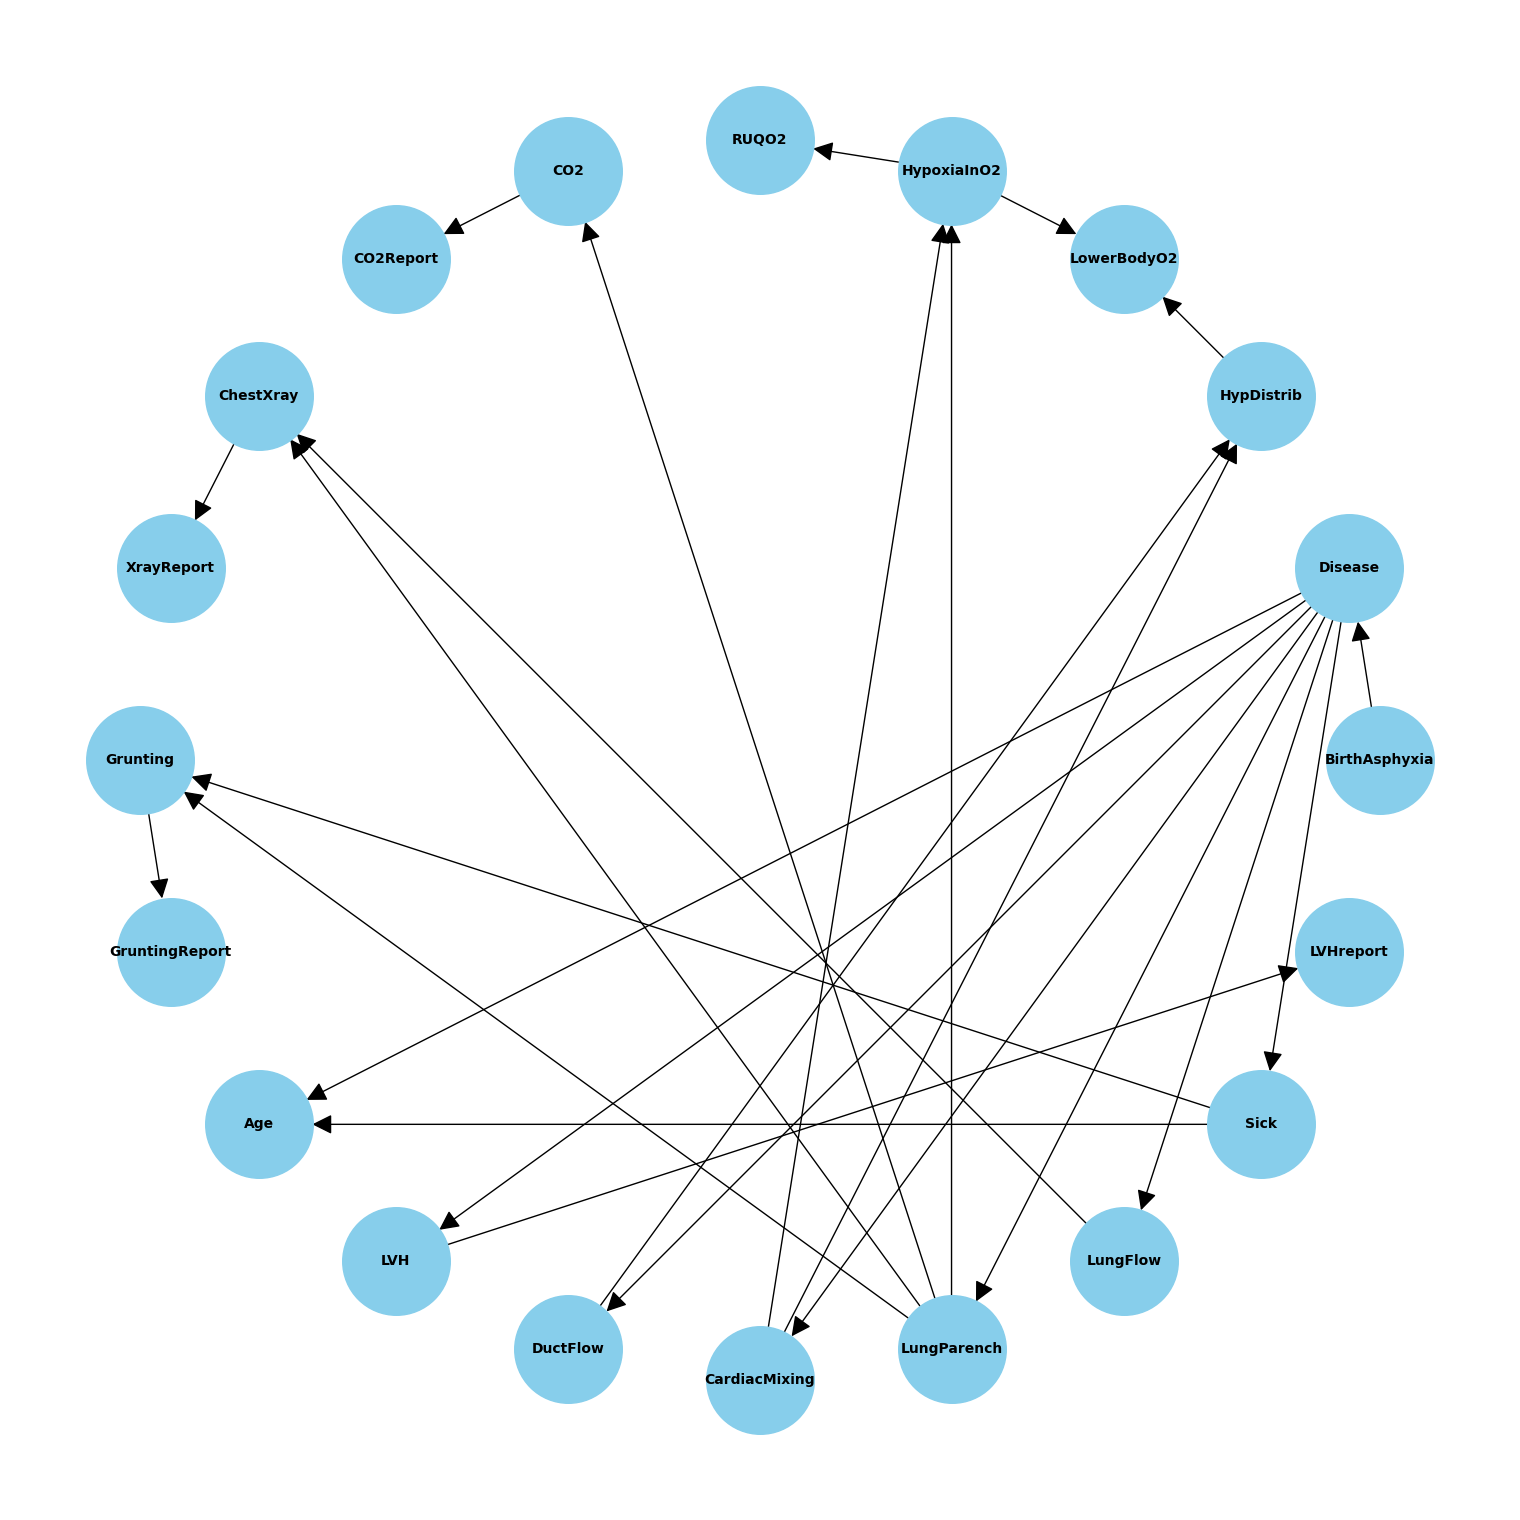

In [7]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

edges = model.edges()
G = nx.DiGraph()
G.add_edges_from(edges)

plt.figure(figsize=(15,15))

pos = nx.circular_layout(G)

nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=6000, node_color="skyblue", font_size=10, arrowsize=30)

#### Let's check the CPDs:

In [8]:
for cpd in model.get_cpds():
    pass
    print(f"CPD of {cpd.variable}: \n{cpd}")

CPD of Age: 
+-----------------+--------------+-----+---------------+---------------+
| Disease         | Disease(PFC) | ... | Disease(Lung) | Disease(Lung) |
+-----------------+--------------+-----+---------------+---------------+
| Sick            | Sick(yes)    | ... | Sick(yes)     | Sick(no)      |
+-----------------+--------------+-----+---------------+---------------+
| Age(0-3_days)   | 0.95         | ... | 0.9           | 0.8           |
+-----------------+--------------+-----+---------------+---------------+
| Age(4-10_days)  | 0.03         | ... | 0.08          | 0.15          |
+-----------------+--------------+-----+---------------+---------------+
| Age(11-30_days) | 0.02         | ... | 0.02          | 0.05          |
+-----------------+--------------+-----+---------------+---------------+
CPD of BirthAsphyxia: 
+--------------------+-----+
| BirthAsphyxia(yes) | 0.1 |
+--------------------+-----+
| BirthAsphyxia(no)  | 0.9 |
+--------------------+-----+
CPD of CO2: 
+--

## Queries

#### At this point, let's compare the queries resulting from the standard variable elimination by `pgmpy` and the Gibbs sampling implemented

In [9]:
import sys
sys.path.append('..')
from tests import get_example_model
from pgmpy.inference import VariableElimination
from inference import GibbsSampling

inference = VariableElimination(model)
gibbs = GibbsSampling(model)
evidence=['GruntingReport','XrayReport','CO2Report']
values={cpd.variable:cpd.state_names[cpd.variable] for cpd in model.get_cpds() if cpd.variable in evidence }
display(values)

{'CO2Report': ['<7.5', '>=7.5'],
 'GruntingReport': ['yes', 'no'],
 'XrayReport': ['Normal', 'Oligaemic', 'Plethoric', 'Grd_Glass', 'Asy/Patchy']}

In [11]:
query={'variables':[
        'Disease',
        'Age',
        'LungFlow'
        ],
    'evidence':{
        'CO2Report':'>=7.5',
        'GruntingReport':'yes',
        'XrayReport':'Normal',
        }}
print(f'Variable Elimination:\n{inference.query(**query)}')
print(f'Gibbs Sampling:\n{gibbs.query(**query)}')

Variable Elimination:
+-----------------+-----------------+------------------+-----------------------------+
| Disease         | Age             | LungFlow         |   phi(Disease,Age,LungFlow) |
+=================+=================+==================+=============================+
| Disease(PFC)    | Age(0-3_days)   | LungFlow(Normal) |                      0.0200 |
+-----------------+-----------------+------------------+-----------------------------+
| Disease(PFC)    | Age(0-3_days)   | LungFlow(Low)    |                      0.0263 |
+-----------------+-----------------+------------------+-----------------------------+
| Disease(PFC)    | Age(0-3_days)   | LungFlow(High)   |                      0.0036 |
+-----------------+-----------------+------------------+-----------------------------+
| Disease(PFC)    | Age(4-10_days)  | LungFlow(Normal) |                      0.0014 |
+-----------------+-----------------+------------------+-----------------------------+
| Disease(PFC)    | A